# Assignment 2

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/). If you're not already a peergrade user, [you can use this link to sign up]( 
https://app.peergrade.io/join/44E47G) - **PLEASE USE YOUR DTU EMAIL WHEN YOU SIGN UP**.

**Peergrading date and time**: \[OPTIONAL FOR ASSIGNMENT 2\] _Remember that after handing in you MAY evaluate a few assignments written by other members of the class_. (Should you choose to do this, the deadline is Tuesday April 11 at noon). 

## A2: A short data story

This assignment is to create a short data-story based on the work we've done in class so far. See **Exercises Week 8, Part 2** for full details on how the story should be constructed.

IndexError: index 0 is out of bounds for axis 0 with size 0

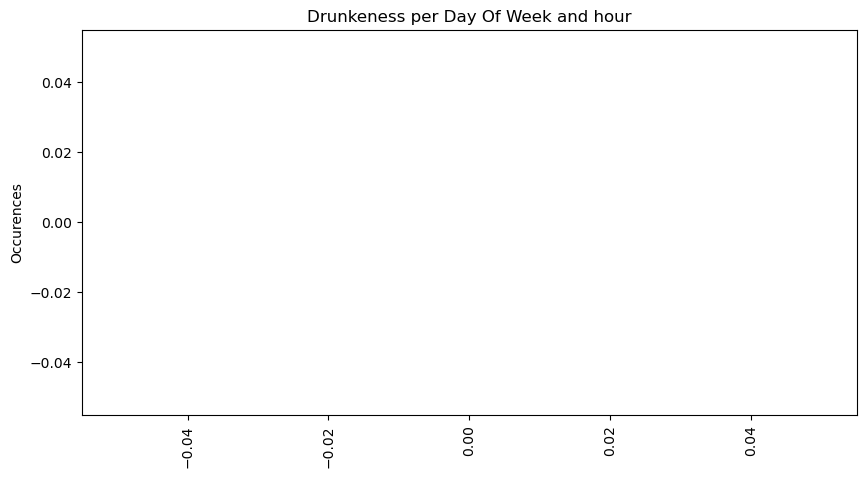

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calplot
from urllib.request import urlopen
import json
import plotly.express as px
from area import area

df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %H:%M')
df = df.drop(df[df['Timestamp'] >= '2018-01-01'].index)
focuscrimes = set(['DRUNKENESS'])

fig = plt.figure(figsize=(10,5))
df_i = df.loc[df.Category == 'DRUNKENESS']
crimes_per_DayOfWeek_and_hour = df_i.groupby([df_i['Timestamp'].dt.day_of_week,df_i['Timestamp'].dt.day_name(),df_i['Timestamp'].dt.hour])['DayOfWeek'].value_counts()
crimes_per_DayOfWeek_and_hour = crimes_per_DayOfWeek_and_hour.droplevel(0,'index').droplevel(0,'index')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams.update({'text.color': "black",
                    'axes.labelcolor': "black",
                    'axes.edgecolor': "black",
                    'xtick.color': "black",
                    'ytick.color': "black"})
crimes_per_DayOfWeek_and_hour.droplevel(1,'index').plot(ax=ax, kind='bar', title='Drunkeness per Day Of Week and hour', xlabel="Day Of Week and hour", ylabel="Occurences", color="darkgreen")
ax.locator_params(axis='x', nbins=7*3)
ax.tick_params( axis='x', labelrotation = 0)
ax2 = ax.twiny()
crimes_per_DayOfWeek_and_hour.droplevel(0,'index').plot(ax=ax2, kind='bar', title='', xlabel='', ylabel='', color="darkgreen")
ax2.locator_params(axis='x', nbins=7)
ax2.tick_params( axis='x', labelrotation = 30)
    
fig.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()
# fig.savefig('../annekdesler.github.io/figures/timeseries_plot.png', transparent=True, bbox_inches='tight')

In [ ]:
from urllib.request import urlopen
import json
import plotly.io as pio

from area import area
# Load the SFPD District shapefiles
#request_url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'
#print('Hello')
#with urlopen(request_url) as response:
#    geodata = json.load(response)
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    geodata = json.load(response)

# Keep the Vehicle Theft on Sundays data
df_filtered = df.loc[(df.Category == 'DRUNKENESS')]
map_data = df_filtered.groupby('PdDistrict')['PdId'].count().reset_index()

# Make the map

areas = [area(geodata['features'][i]['geometry']) for i in range(len(geodata['features']))]
tot_area = sum(areas)
w_areas = [areas[i]/tot_area for i in range(len(geodata['features']))]

map_data = df_filtered.groupby('PdDistrict')['PdId'].count().reset_index()

# Adjust data for area
map_data['PdId'] = map_data['PdId']*w_areas

# Make the map
fig = px.choropleth_mapbox(map_data, geojson=geodata, locations='PdDistrict', color='PdId',
                           color_continuous_scale="RdYlGn_r",
                           range_color=(map_data.PdId.min(), map_data.PdId.max()),
                           mapbox_style="carto-darkmatter",
                           zoom=11, center = {"lat": 37.7652, "lon": -122.4529},
                           opacity=0.5
                          )
fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, coloraxis_colorbar=dict(title='Crime density'),font = {"size": 9, "color":"gainsboro"},
                                  titlefont = {"size": 15, "color":"gainsboro"},)
fig.show()
pio.write_html(fig,file='../annekdesler.github.io/_includes/map_plot.html')

ValueError: operands could not be broadcast together with shapes (0,) (10,) 